In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data =pd.read_csv('iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
data.shape
data.columns
data['species'].value_counts() # class label # balanced Dataset- no of datapoints for each class label are same

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

# Scatter Plot

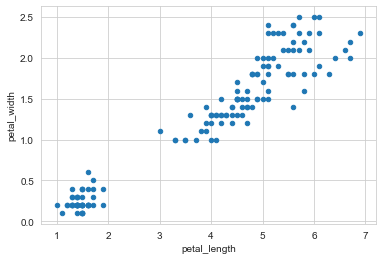

In [ ]:
#Obj:given a new flower with all features, how to find its class label ie.. which species it belongs to
sns.set_style('whitegrid')
data.plot(kind='scatter', x='petal_length', y='petal_width') ;
plt.show()


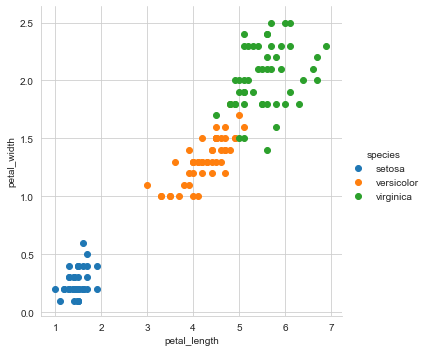

In [ ]:
sns.FacetGrid(data,hue = 'species',height = 5)\
    .map(plt.scatter,'petal_length','petal_width')\
    .add_legend()
plt.show()


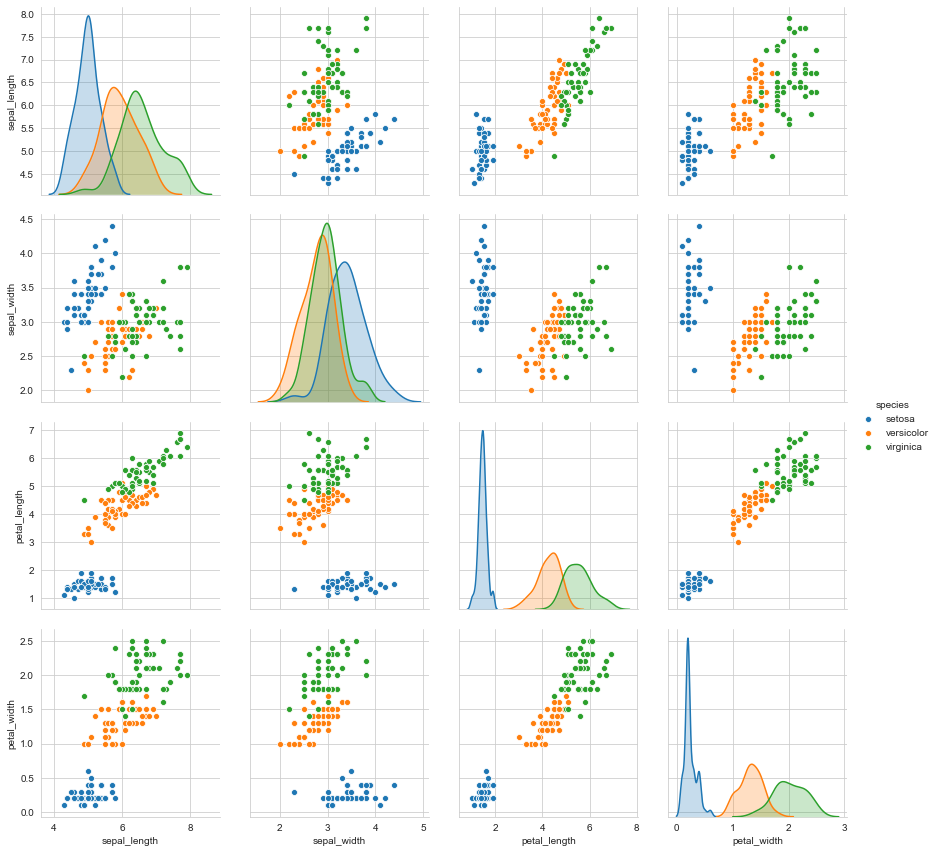

In [ ]:
# pair plots - can be used  if no of dimensions are less(4-6)
sns.pairplot(data,hue = 'species', height = 3)

# PDF:

In [ ]:
##  CDF curves lies btwn 0-1
## intake from CDF curve/ what to understand from CDF curve: if we take setosa(blue-orange) , 80% of setosa flowers have 
## petal length(x-axis) less than 1.6
## intake from PDF curve : 20% of setosa flowers have petal length between 1.4 to 1.6

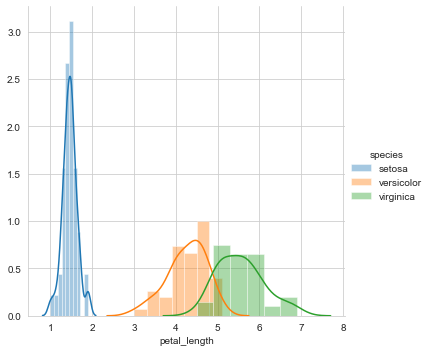

In [ ]:
# pdf for one feature; to find out the range in which each class label falls into, we can use pdf; focus on X-axis

sns.FacetGrid(data,hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

In [ ]:
data_set = pd.DataFrame(data[data['species'] == 'setosa'])
data_ver = pd.DataFrame(data[data['species'] == 'versicolor'])
data_vir = pd.DataFrame(data[data['species'] == 'virginica'])
data_set.shape

(50, 5)

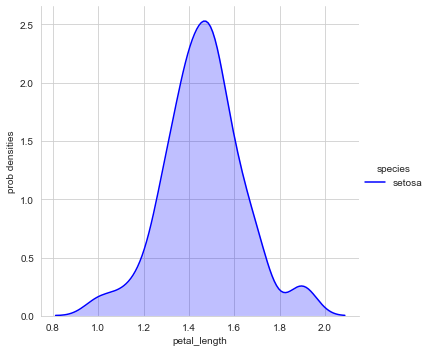

In [ ]:
sns.FacetGrid(data_set, hue="species", size=5) \
   .map(sns.kdeplot, "petal_length",color = 'b',shade = True) \
   .add_legend();
plt.ylabel('prob densities')
plt.show();


# CDF

pdf: [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
bin_edges: [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
pdf: [0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
bin_edges: [3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
pdf: [0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
bin_edges: [4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


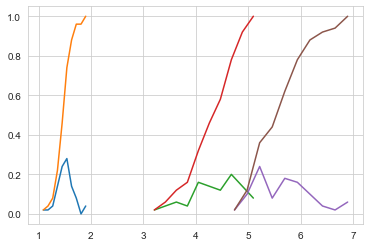

In [ ]:
# we can find how much percentage of the observations of each class label will have its feature <> some value
# ranges from [0-1]

#Setosa
counts, bin_edges = np.histogram(data_set['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('pdf:',pdf);
print('bin_edges:',bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)


# Versicolor
counts, bin_edges = np.histogram(data_ver['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('pdf:',pdf);
print('bin_edges:',bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)


#virginicaMedian, Percentile, Quantile, IQR, MAD

counts, bin_edges = np.histogram(data_vir['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print('pdf:',pdf);
print('bin_edges:',bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

plt.show()

pdf: [0.08 0.02 0.12 0.2  0.1  0.16 0.1  0.06 0.1  0.06]
bin_edges: [4.9  5.11 5.32 5.53 5.74 5.95 6.16 6.37 6.58 6.79 7.  ]
pdf: [0.02 0.04 0.12 0.08 0.06 0.22 0.14 0.22 0.06 0.04]
bin_edges: [2.   2.14 2.28 2.42 2.56 2.7  2.84 2.98 3.12 3.26 3.4 ]
pdf: [0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
bin_edges: [3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
pdf: [0.14 0.06 0.1  0.26 0.   0.14 0.2  0.06 0.02 0.02]
bin_edges: [1.   1.08 1.16 1.24 1.32 1.4  1.48 1.56 1.64 1.72 1.8 ]


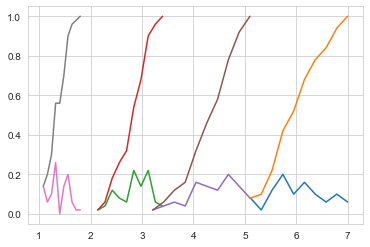

In [ ]:
for i,feature in enumerate(list(data.columns)[:-1]):
    # Versicolor
    counts, bin_edges = np.histogram(data_ver[feature], bins=10, 
                                     density = True)
    pdf = counts/(sum(counts))
    print('pdf:',pdf);
    print('bin_edges:',bin_edges);

    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf);
    plt.plot(bin_edges[1:], cdf)


# Statistics-Mean, Variance and Std-dev

In [ ]:
# to know more info about the dataset, we can use these

In [ ]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(data_set["petal_length"]))
#Mean with an outlier.
## outlier: if atleast one datapoint/observations is error, whole mean n std vl vary drastically
print(np.mean(np.append(data_set["petal_length"],50)));
print(np.mean(data_vir["petal_length"]))


print("\nStd-dev:");
print(np.std(data_set["petal_length"]))
print(np.std(data_vir["petal_length"]))



Means:
1.464
2.4156862745098038
5.552

Std-dev:
0.17176728442867115
0.5463478745268441


In [ ]:
## here we can say that average petal lengths of setosa are less than other two - mean
##  setosa petals are less spread than other two(densely grouped)
## variance/spread/std - how wide petals are
## std = square root of variance
## if v have variance assume 0.5, then std of setosa will be mean +/- variance ie.. (0.9,1.9)- width of petals 
## Range: (1.46-0.17, 1.46, 1.46+0.17)  ## setosa

## Mean n Std vl vary if there is any outlier.. alternative is median for mean; median absolute deviation for std

# Median, Percentile, Quantile, IQR, MAD


In [ ]:
print("Medians:")
print(np.median(data_set["petal_length"]))
#Median with an outlier.
print(np.median(np.append(data_set["petal_length"],50)));
print(np.median(data_vir["petal_length"]))

from statsmodels import robust
print("\nmedian absolute deviation:");
print(robust.mad(data_set["petal_length"]))
print(robust.mad(data_vir["petal_length"]))

print("\nQuantiles:")
print(np.percentile(data_set["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(data_vir["petal_length"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(data_set["petal_length"],90))
print(np.percentile(data_vir["petal_length"],90))


Medians:
1.5
1.5
5.55

median absolute deviation:
0.14826022185056031
0.6671709983275211

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]

90th Percentiles:
1.7
6.3100000000000005


In [ ]:
## Percentiles - 
## eg: x= [1,2,3....n(100)] - SORTED list
##  median =  (n+1)/2 ; if n is odd, 
## median =  (n/2 + ((n/2)+1))/2   ; if n is even -  average/mean of middle two num
## here, median = (50+51)/2;
## percentile can be calculated  as sort the list and we can call the index numbers as percentiles
## 0,25,50,75 percentiles are called as Quantiles
## 50th percentile - median
## Inter Quartile Range(IQR) - diff b/w 25th percentile and 75th percentile..

# Box plot and Whiskers

In [ ]:
#Box-plot can be visualized as a PDF on the side-ways.

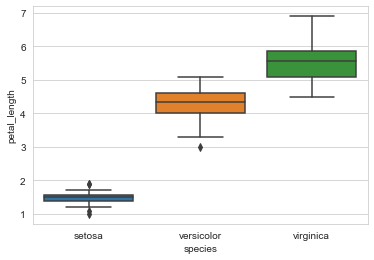

In [ ]:
## Box Plots with Whiskers for 1-D like histograms

sns.boxplot(x='species',y = 'petal_length', data = data)

plt.show()

In [ ]:
## all v can get from box plot is 25th, 50th, 75th percentile of all groups of class labels along with whiskers
## width does not represent anything
## here for versicolor species, 25th percentile is at 4; 50th percentile is at 4.4; 75th percentile is at 4.7
## 25 percentage of  versicolor flowers have petal length b/w 3.2-4 --> whisker

# Violin plot

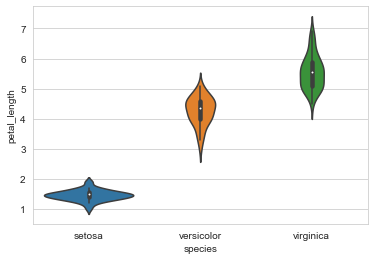

In [ ]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=data, size=8)
plt.show()

In [ ]:
## mid white dot represents 50th percentile
## mid fig is box plot
## if u see it sideways-->  it is PDF
## Univariate Analysis - analyzing with only one feature.. box plots/violin plot/ 1-D pdf(historam)/cdf
## bivariate analysis - pair plots/scatter plots
## multi variate analysis - 3D scatter plot/ contour density plot(2D)

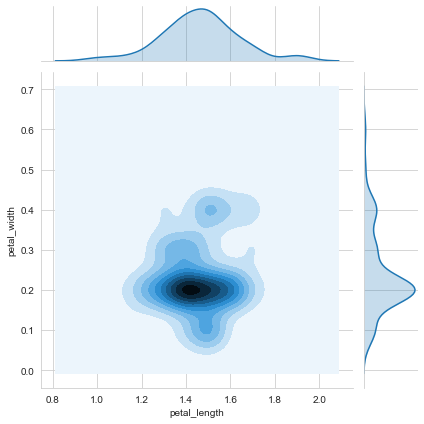

In [ ]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=data_set, kind="kde");
plt.show();

# Prob:

In [ ]:
## Prob & Stats

## Random Variables- discrete/continuous
## population/sample(subset)--- if sample size increases, sample mean = population mean

## Gaussian Dist- normal dist - bell curves - continuous RV; parameters: mew - mean,sigma^2- variance
## X~N(mean, variance) means RV X follows Gaussian dist
## X~N(0,4) means mean is 0, variance is 4 n std is 2(sigma)

## PDF:
## peak of pdf is mean; if variance decreases, bel curve is sharp n lengthier
## if variance increases, bel curve is shorter n fatter
## if a feature follows Gaussian dist and mean n variance are given..then its easy to plot pdf
## obs of Normal dist: if x(feature) moves away from mean, y(PDF) reduces fastly..ie.. e(-(x^2));
##                     bell shape curves are symmetric 
##                   ie.. 50% of values will be left of mean n other 50% on right of mean;

## CDF of Gaussian dist:
## CDF ranges from 0-1
## it gives prob of RV
## if variance increases, CDF will move away from mean 

## 68-95-99.7 rule:
## if given X~N(100,25)ie.. X is a continuous RV of heights, then mean = 100 n variance = 25 n std = 5
## About 68% of heights ranges from (100-5,100+5) ie.. (95-105) -(mean - 1sigma,mean + 1sigma) 
## About 95% of heights ranges from (100-10,100+10 ie..(90-110) -(mean - 2sigma, mean + 2sigma)
## About 99.7% of heights ranges from (100-15,100+15 ie..(85-115) -(3sigma)

## Asymmetric Dist/Skewness/Kurtosis:
## Symmetric dist - gaussian dist
## in case of non symmetric dist, 
##               if X is a RV, n PDF of X has large tail on Left side then it is negative Skew/left skew
##               if X is a RV, n PDF of X has large tail on Right side then it is positive Skew/right skew
## mean gives central loc;
## variance gives spread;
## Skewness gives how dissimilar/asymmetric the dist is;
## Kurtosis gives how sharper/peak the dist is 
## if kurtosis increases.. peakness increases

## Standard Normal Variate:
## z~N(0,1)
## standardization - transforming any RV to a standard form with mean 0 n variance 1
## if we convert.. we can easily understand that 68% of values will be in rane of(-1,1) n 95% of values in (-2,2)
## X~N(mean,variance)
## z= (x-mean)/std -- to convert any RV to Standard normal variate

## KDE(Kernel density Estimate):
## smoothened Histogram -PDF (can be done by usin KDE)
## if density of points is high, PDF will be sharp at that point
## summing up of all points on multiple Gaussian kernels(curves) gives height of PDF whereas bandwidth
## gives variance of PDF

In [ ]:
## Chebyshev's inequality:

## if we knw that a RV S(Salary) has finite mean n non zero &finite variance/std.. but we dont knw which dist it is
## then  que: how many ppl have salary in the range of [20k,60k]
## (mean-k(std) < S < mean+k(std)) > (1-(1/k^2))
##  jst replace mean n variance ..v can get %

In [ ]:
## Uniform Dist:

## PMF: for discrete RV
## PDF: for continuous RV
## Parameters of unifrm dist: a,b; a and b are integers(b>a) and n(no. of.outcomes) = b-a+1
## all outcomes are equally probable eg.. fair dice, toin coss
## PMF : 1/n
## mean/median = (a+b)/2

## UF Dist for continous RV
## PDF : 1/(b-a)

In [ ]:
## Samplin Dist of Sample means/ CLT(central limit tendency):
## Assume there total of 30k observations with mean mew n variance sigma^2 ... population
## we will consider m samples of size n... 
## ..m= 1000 samples, n = 30 with mean xi bar(sample mean) n variance as (sigma^2)/n
## ie.. samples: s1, s2, s3... sm
## means of samples: x1 bar, x2 bar...xm bar --->dist of these xi bars = sampling dist of sample means
## CLT says: if n >= 30, above dist will follow Gaussian dist..
## Also, mean of sample means(xi bar) = population mean n sample variance = population variance/sqrt(n)
## CLT will not work on RV x with infinite mean n variance

In [ ]:
## How to test if a RV is normally dist(Gaussian) or not?
## Many ways to do that
## Q-Q Plots; statistical testing methods like KS test;AD...

## Q-Q plot(Quantile-Quantile):(Graphical technique)
## Sort the RV n Compute percentiles(y-axis)
## take standard normal variate on x-axis as theoritical quantities
## plot the points from 0-99th percentile
## If all points on the red line- then RV measuremnts is normally dist
## also we can say that both x & y are gaussian dist
## limitations: if obs/ sample size are small, Q-Q plot will not work

In [ ]:
## Bernouli & Binomial dist: for discrete RV
## Bernouli dist have only two outcomes..ie...p,1-p(q); parameter: p;(0<p<1)
## PMF: 
## mean = p
## x = bernouli(p=0.5)
## y = Bin(n,p)- binomial dist; n - no of trials, p is  success prob in each trial

In [ ]:
## Log Normal dist: for continuous RV
## if X~log-normal(mean,std) if log(x) is normally dist
## it is also called heavy tail/ right skewed dist
## widely used along with pareto dist in internet based companies
## eg: human beviours: len of comments in internet discussion forums like quora, reddit
## in economics
## how to find if X is log-normal dist or not?
# x1,x2,...xn
# y1= ln(x1),y2 =ln(x2)...yn =ln(xn)
# use Q-Q plot and if yi's are gaussian/normal dist..then X is log normal for sure..

In [ ]:
## Power Law Dist:
## log-log plots to determine Power law dist
## long tail Dist
## Pareto Dist: for continuous RV
## parameters: xm(mean),alpha(variance)
## if alpha reduces, fatness increases
## if alpha = infinity, ->dirac delta func

In [ ]:
## Box-cox transform : converting RV of perito dist to gaussian dist
## 1. boxcox(x) gives lambda
## 2. yi = ln(x) if lambda = 0 -->log normal dist
##      = .....
## sometimes, boxcox is used to transform any non gaussian to gaussian dist

In [ ]:
## Weibull dist:
## Rainfall data
# parameters :lambda,k

In [ ]:
## to identify the relationship b/w two RV's (X,Y)-->3 ways
# co-Variance
# PCC (pearson co-eff correlation)
# spearman rank core coeff
## Co-variance:
# Cov(X,X) = Var(X)
# Cov(X,Y) = +ve if X inc n Y inc
# Cov(X,Y) = -ve if X inc n Y dec
## we dont know hw much increase or decrease
## Also, if units of RV changed..Cov will not be equal -- to fix this, use Pearson Co-eff


In [ ]:
## PCC:
# denoted by row(similar to p)
# row ranges from (0-1)
# if X inc.. n Y inc.. row = 1
# if X inc.. n Y dec.. row = -1
# if there is no relation b/w RV then row = 0 (eg.. heights n grades)
# PCC works well if data plotted is linear.. linear relationships b/w RV
# even if data is not linear.. but y inc along with x inc.. pcc = 0.8(eg..) 
## but not 1 -- to fix these kind of -- spearman


In [ ]:
## Spearman rank corr coeff(r):
# for given Rv's.. (X,Y) 
# if X inc, Y inc and if it is linear, Pcc = +1
# here in spearman.. calc ranks for (X,Y) and irrespective of linearity, if X inc, Y inc then r = +1;
# if X inc, Y dec then r = -1 (non linear relation b/w RV)
# r = pcc(rx,ry)

In [ ]:
## Correlation n Causation are different
## eg of COrrelations:
# 1. Years of eductaion correlates with income
# 2. income correlates with higher sq footae of home
# 3. dosage of drug vs reduction in blood sugar
# 4. Ecommerce:  time spent in 24 hrs vs money spent in 24hrs
# 5. new/unique visitors in a day vs sales in a day

# Random Number Generator (Uniform/Normal Distribution)

In [ ]:
rv = np.random.normal(loc = 0, scale = 1,size =5)
rv
#r = stats.norm.rvs(size=5)
#r

array([ 0.36861942,  0.07961933, -0.18676804,  0.84167391, -1.32869166])

In [ ]:
rv_u = np.random.uniform(0.0,1.0,5)
rv_u

array([0.04767778, 0.37018677, 0.2236835 , 0.81429056, 0.56593586])

# Q-Q Plot on random numbers to find if dist is normal

In [ ]:
#Q-Q plot
import numpy as np 
import pylab 
import scipy.stats as stats

# N(0,1)
std_normal = np.random.normal(loc = 0, scale = 1, size=1000)

# 0 to 100th percentiles of std-normal
for i in range(0,5):
    print(i, np.percentile(std_normal,i))

0 -3.5717775309212954
1 -2.4086705584954937
2 -1.9379803308539971
3 -1.755762218660994
4 -1.6590270477871814


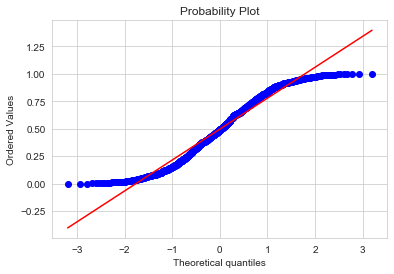

In [ ]:
# generate 1000 sanples from N(20,5)
measurements = np.random.normal(loc = 20, scale = 5, size=1000)# loc-mean;scale-std; x-axis:Norm; y-axis:measurements
test = np.random.rand(1000)
test1 = np.random.uniform(low=-1, high=1, size=1000) 
stats.probplot(test, dist="norm", plot=pylab) # not gaussian
#stats.probplot(measurements, dist="norm", plot=pylab) # gaussian
#stats.probplot(test, dist="norm", plot=pylab) # not gaussian
pylab.show()
#test

# sampling 30 observations from 150 in Iris Dataset

In [ ]:
m = 150
n = 30
p = n/m  ## p = 0.2
d = data.drop(['species'],axis =1)
iris = d.to_numpy()
print(iris[0])
sampl=[]
for i in range(0,n):  ## we may not get exact 30 samples everytime
    a= np.random.random() 
    #print('a:',a)
    #print('p:',p)
    if a <=p:           ## uniformly distributed
        sampl.append(iris[i,:])
print(sampl)

    

[5.1 3.5 1.4 0.2]
[array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.3, 0.4]), array([5.7, 3.8, 1.7, 0.3]), array([4.8, 3.4, 1.9, 0.2])]


# Q-Q plot on Iris Dataset

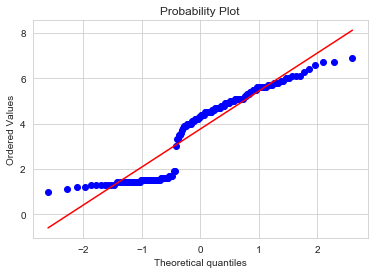

In [ ]:
stats.probplot(data['petal_length'],dist = 'norm',plot = pylab)
pylab.show()

# Box-Cox transformation

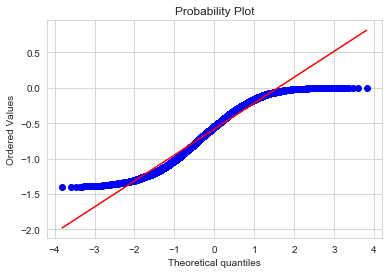

In [ ]:
#boxcox is used to transform any non gaussian to gaussian dist
from scipy import stats
#b = np.array(data_set['petal_length'])
r = np.random.uniform(0,1,10000)
b1,l = stats.boxcox(abs(r))
stats.probplot(b1,dist = 'norm',plot = pylab)
pylab.show()

In [ ]:
## Hypothesis Testing
# assume there are two classes with heights of students
# Ques: is there any diff b/w heights of students in cl1 n cl2??

# v can plot histogram pdf of both cl1 n cl2 n get means of cl1 n cl2
# it is observed that mean of cl2 > mean of cl1... v cannot conclude if diff is very less
# so go for hypothesis testing - 3 steps
# 1. choosing test statistic -- mean2 - mean1
# 2. Null Hypothesis (h0) -- assuming there is no diff b/w heights (proof by contradiction)
#    alternative hyp(h1) -- diff in heights
# 3. compute p- value: prob of observing (mean2-mean1) if h0 is true
#    if p-value is 0.9 ..then null hypothesis(h0) is true
#    if p-value is 0.05.. then null hypothesis is false n alternative hyp is correct

In [ ]:
# task: given a coin, determine if coin is biased towards heads or not
#       Biased towards heads means p(H)>0.5
#       Not biased towards heads means p(H)= 0.5

# Design exp1: flip the coin 5 times and Rv X: count no of heads; --- Test Statistic
#    X = {H,H,H,H,H} =  5 --- Observation
# p(X=5|given coin is not biased towards heads) = p(obs|assumption);assumption is null hypothesis
# p(X=5|h0)= (1/2)(1/2)(1/2)(1/2)(1/2) = 1/32 = 0.03 = 3%(small)
# there are 3% of chances of getting 5 heads in 5 flips if coin is not biased towards heads---> incorrect
# so, assumption is wrong.. null hypothesis is incorrect
# accept that coin is biased

# design exp2: flip coin 3 times and Rv X: count no of heads; --- Test Statistic
#         X = {H,H,H} =  3 --- Observation
# p(X=3|given coin is not biased towards heads) = p(obs|assumption);assumption is null hypothesis
# p(X=3|h0)= (1/2)(1/2)(1/2) = 1/8 = 12.5 > 5%
# there are 12.5% (>5 -- v can consider; if <5%.. reject null hypothesis) of chances of getting 3 heads in 5 flips 
# if coin is not biased towards heads---> Correct
# so, null hypothesis is correct in this case
# accept the assumption

# Things to consider during hypothesis testing 
# 1. design experiment
# 2. design null hypothesis-- P(obs/h0)is easy
# 3. design test statistic X

In [ ]:
# K-S test:
# if two RV X of n samples n Y of m samples; is two RV's fall into same dist?
# or is the dist X same as Y?
# Null Hyp: X n Y have same dist
# Test Statistic: when we plot CDF of both RV,max diff b/w those two can be considered as test statistic
# D(n,m) = sup(CDF(X with n samples)-CDF(Y with m samples))  --- test statistic
# if n and m are large-- D will be 0 --> ho is true
# Null hyp is rejected at level alpha if  D(n,m)>c(alpha)sqrt((n+m)/mn)
# COmpute D(n,m) values at diff n and m samples..and see 
# if n= 1000, m = 5000, let say we compute p-value at alpha = 5%(0.05) sig level.
# C(alpha) values are given in table
# D(n,m)> 0.047
# if max dist b/w thwo CDF is assume 0.2 ie... D = 0.2 n we got 0.04
# so D> 0.04 so, h0( null hypothesis is rejected)
# if we take n= 50, m = 30, D(n,m)>0.31 in this case.. it is false.. so accept h0 at 5% sig level
# if taken more n more samples... dist b/w two CDF's will be very small


In [ ]:
## Hypothesis testin is used in KS test(appln) to knw if two RV's have same dist or not
# another eg: drug comparison in medicines
# Drug D1 : takes 4 hrs to reduce fever; Drug D2: claims that takes lesser thantime taken by D1
# design exp: take two samples of D1 n D2 os size 50 compute mean n cal diff n call it as mean2-mean1
# h0: the time taken to reduce fever for both drugs are same
# test statistic:X: mean2-mean1
# P(X|h0):compute using resampling n permutation test
# check if null hyp is correct or incorrect n conclude
# usually in medicines, p_value should be < 1%(not 5%) -- reject h0
# eg: customers who use Visa credit card spend more on ecommerce or not than master credit card

In [ ]:
# another example for Hypothetical Testing
# task: determine if population mean of heights of ppl in two cities are same or not?
# design exp: lets take heights of 50 ppl randomly from cl1 n cl2 as H1 n H2 --- a sample of size 50
#             take their mean.. assume the observed mean(50 from cl1) =162, mean(50 from cl2) = 167
# Test statistic : mean2-mean1 = 167-162 = 5 -- diff b/w sample means
# Null hyp: there is no diff in population mean of heights of two cities
# Compute: p(obs|h0):p(5|h0) : prob of observing diff b/w sample means if there is no diff in population means
#  case 1:if P-value = 0.2 = 20% then assumption must be true... accept null hyp(h0)
#  case 2: if p-value = 0.03 = 3%, then assumption is incorrect ... reject null hyp..accpt that there is significant
#         diff in population means of heights in two cities.. population means are not same

# how to compute p-value:
# usin resampling n permutation test:
# 1. take a set S:{mix all 50 heights from cl1 n cl2}..S = {h1,h2,.h50,h1,h2..h50}
# 2. create two samples s1 n s2 and randomly select 50 values for each sample --->resampling (simulate h0)
#    1. compute means as mean1, mean2, cal diff mean2-mean1 = 3
#    2. do this resampling .. take 2 samples of size 50 each, compute means n cal diff mean2-mean1 = -2
#    3. repeat it ..k times ...mean2-mean1 = 6
#    4. Assume k = 1000
# 3. sort all means in asc order and (3,-1,....5..6) here 5 is test statistic(X)
#    case-1 : p(X>=5 | h0) :
#             if 80% of values <=X(ie..5) and 20 % of values >X(ie..5)
#             then p(X>=5| h0) = 20% means accept null hyp that there is no diff b/w population means
#    case-2 : p(X>=5 | h0) :
#             if 97% of values <=X(ie..5) and 3 % of values >X(ie..5)
#             then p(X>=5| h0) = 3% means reject null hyp ie.. there is diff b/w population means

# KS test to find if dist is gaussian

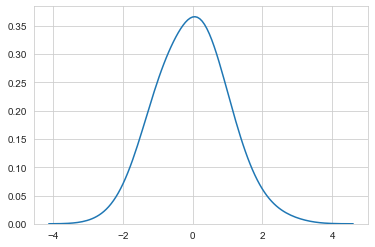

KstestResult(statistic=0.03965159532940954, pvalue=0.08389448294638883)

In [ ]:
x = stats.norm.rvs(size=1000)
y = np.random.normal(0,1,1000)
sns.set_style('whitegrid')
sns.kdeplot(x, bw=0.5)
plt.show()
stats.kstest(y,'norm')
# see P value > 0.5.. v can say RV X ~N(0,1); here statistic is D

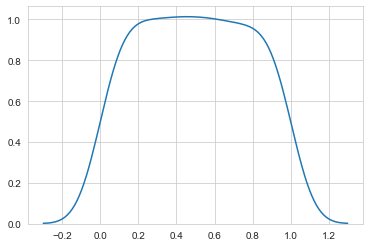

KstestResult(statistic=0.5000924381820179, pvalue=0.0)

In [ ]:
# Generating uniform RV
y = stats.uniform.rvs(size = 10000) # or
Y = np.random.uniform(0,1,10000)

# 
sns.kdeplot(np.array(y), bw = 0.1)
plt.show()

# compute KS test
stats.kstest(y,'norm')
# see P-value and hence Y is not gaussian dist

In [ ]:
## Proportional Sampling:

# eg: D= [2.0,3.3,1.2,4.5,20.0]--[d1,d2,d3,d4,d5]
# Task: picking up an element among n elements such that prob of pickin an element is proportional to di's
# here value prob of pickin value(20.0)ie.. d5 is very high n prob of picking value(1.2) ie..d3 is very low
# how:
# 1.
#  1. compute sum ie.. 35
#  2. normalize all values (d1,d2..d5) using sum ie.. (d1/35,d2/35..d5/35)dashes and it ranges from (0-1) ,its sum = 1 
#  3. cumulative normalized sum  ie.. d1~ = d1-dash,d2~ = d1~ +d2-dash..d5~ = d4~ + d5-dash = 1
# 2. sample one value b/w(0-1)
#    ie.. r = np.random.uniform(0.0,1.0,1) let r = 0.6
# 3. proportional samplin:
#    if r<= d1~ : return d1..compare all.. if r<=d5~ then return d5
# so here v vl get d5

In [ ]:
## Confidence Interval(C.I):
# Assume RV of (heights) X with population of 500, dont knw what dist is
# lets take 10 samples of size 10 .. x1,x2,..x10
# wat will be the population mean?
# approx, we can say that sample mean = population mean ----> point estimate
# Assume if we say that mean lies in [18.2 - 24.7] with 95 % prob ---> Confidence interval

# if we knw dist is Gaussian then v can clearly say that [mean-2sigma, mean + 2sigma] gives 95% prob--> C.I
# if we want to know values within 90% prob range: Normal dist tables

# Calculate C.I for population mean of a RV:
# case 1: only population variance is given(Sigma = 40)
# we vl take 10 samples of size 10 of the RV
# [10,20,30,40,50,60,70,80,90,0]; sample mean = 45; from CLT( as mean n std is finite) we know that
# sample variance = population variance /sqrt(n); ie.. 40/sqrt(10) = 12.6
# also, from CLT, we can say that sample mean = population mean and it follows Gaussain dist
# so, C.I of population mean = [mean-2sigma, mean+2sigma] with 95%
# ie.. C.I = [45-2(12.6), 45+2(2.12.6)] with 95% prob
# Case-2: if population variance is not given:
# use Student's T dist: sample mean(x bar)~T(n-1) degrees of freedom
# degrees inc, peak inc

# wat abt C.I for median/90th percentile/any other statistics of RV? how to compute?
# use Bootstrap


In [ ]:
# Empirical Bootstrap is the best method to find C.I of any statistics
# Task: estimate 95% C.I for median of a RV X 
# take n samples of size 10 initially...(x1,x2,...xn)---S
# by using uniform RV, artifically create k multiple bootstrap samples of size m from above n samples(m<n) 
# ... (x1-1,x2-1,...xm-1) ---s1,median = m1
# ...(x1-2,x2-2,..xm-2) ---s2,median = m2
# ...(xk-1,xk-2...xk-m) ---sk, median = mk
# ie.. sampling with repetition/replacement
# sort all the medians let k = 1000
# m1<=m2<=m3<=...m1000
# since v need 95% C.I -- 950 points n 25 each on other two sides.. r/k =95%,then r=950
# [m25,m975] vl be 95% C.I


# Empirical bootstrap based Confidence Interval

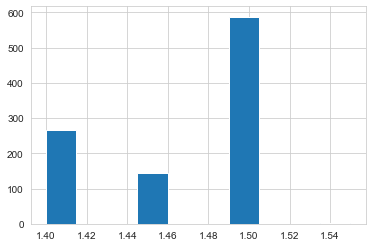

[1.5, 1.5, 1.5, 1.4, 1.4]
2.500000000000002
95.0 confidence interval 1.4 and 1.5


In [ ]:
# TAsk: Find 95% C.I for median of RV x ; 

from sklearn.utils import resample 
from matplotlib import pyplot

# load dataset
x = data_set['petal_length'].to_numpy()

# configure bootstrap
n_iter = 1000 # no of bootstrap samples
size = 30 # sample size

# run bootstrap
medians = []
for i in range(n_iter): # create 1000 bootstrap samples of size 30
    s = resample(x,n_samples = size)
    m = np.median(s)
    medians.append(m)
    
# plot scores
pyplot.hist(medians)
pyplot.show()

# Confidence intervals
alpha = 0.95
print(medians[0:5])
p = ((1.0-alpha)/2.0) * 100
print(p)
lower =  np.percentile(medians, p)

p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(medians, p)

print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))

